In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.coordinates import SkyCoord
import astropy.units as u
from tqdm import tqdm

In [2]:
pairs = Table.read('pairs.fits')

In [3]:
len(pairs)

1047

In [4]:
pairs = pairs[(np.abs(pairs['bp1'] - pairs['bp2']) <= 0.1)
     & (np.abs(pairs['rp1'] - pairs['rp2']) <= 0.1)]
len(pairs)

269

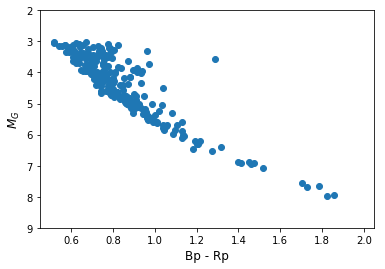

In [39]:
plt.scatter(pairs['bp1'] - pairs['rp1'], pairs['mg1'])
plt.xlim([0.45,2.05])
plt.ylim([9,2])
plt.xlabel('Bp - Rp', fontsize=12)
plt.ylabel(r'$M_G$', fontsize=12);

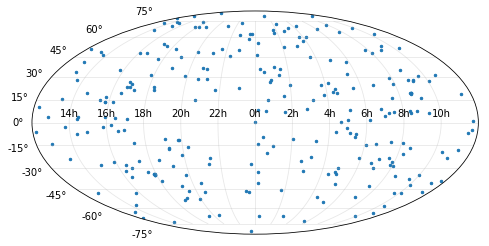

In [48]:
import astropy.coordinates as coord
ra = coord.Angle(pairs['ra1']*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(pairs['dec1']*u.degree)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra.radian, dec.radian, s=6)
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.grid(True, alpha=0.3);

In [8]:
projected_sep = pairs['angsep'] * (pairs['plx1'] * u.mas).to(u.pc, equivalencies=u.parallax()).value

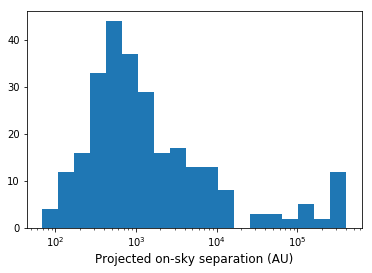

In [11]:
plt.hist(projected_sep, bins=np.logspace(np.log10(projected_sep.min()), np.log10(projected_sep.max()), num=20))
plt.xscale('log')
plt.xlabel('Projected on-sky separation (AU)',fontsize=12);

In [14]:
sep = np.sqrt(projected_sep**2 + ((pairs['delta_distance'] * u.pc).to(u.au).value)**2)

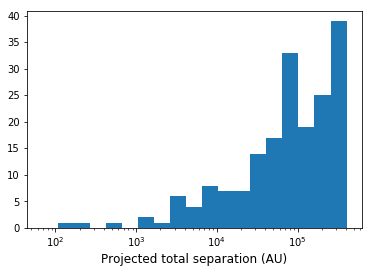

In [15]:
plt.hist(sep, bins=np.logspace(np.log10(projected_sep.min()), np.log10(projected_sep.max()), num=20))
plt.xscale('log')
plt.xlabel('Projected total separation (AU)',fontsize=12);

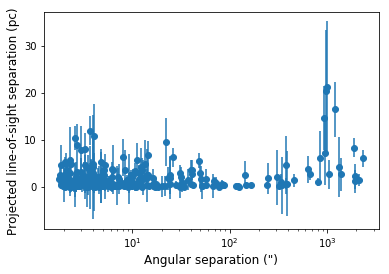

In [50]:
plt.errorbar(pairs['angsep'], pairs['delta_distance'], 
             pairs['delta_distance_error'], ls='', fmt='o')
plt.xlabel('Angular separation (\")', fontsize=12)
plt.ylabel('Projected line-of-sight separation (pc)', fontsize=12)
plt.xscale('log');
#plt.yscale('log');

#### Potential issues:
- how well can we know the actual separation when line-of-sight is uncertain?
- how do we avoid having a higher contamination rate (and therefore a greater likelihood of unrelated abundances) at large separations?

##### solution to both of these: RVs???

If all pairs have zero eccentricity, are seen edge-on, and have semimajor axes equal to their current on-sky separations:

In [55]:
masses = 1. * u.M_sun # hack!!! replace this with calculation of expected star masses
e = 1. # zero eccentricity
true_seps = projected_sep
Ks = 28.4329 * masses.to(u.M_jup).value / np.sqrt(2.) / np.sqrt(true_seps) #/ np.sqrt(1. - e**2)

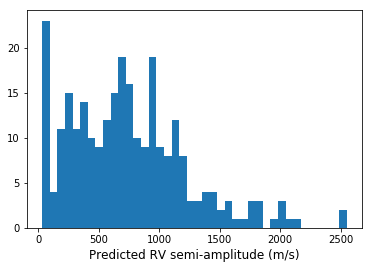

In [60]:
plt.hist(Ks, bins=40)
plt.xlabel('Predicted RV semi-amplitude (m/s)', fontsize=12);